<a href="https://www.kaggle.com/code/aymanemoumen/iris-machine-learning-project?scriptVersionId=125581362" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **This notebook is part of a Machine Learning course project** 

**By : Ayman Moumen**

# <center>Iris Species Classification</center>
<div style="width:100%;text-align: center;"> <img align = middle src="https://hellor.netlify.app/slides/iris_flower_dataset.png" style="height:300px;"> </div>

<font size="4"> The dataset studied in this project is the Iris dataset. It contains information about iris species classification by sepal and petal size. </font>
  
<font size="3">  Machine learning model is needed in order to classify the appropriate iris species based on sepal and petal size 
  
The models used in this notebook: </font>
- **K-Nearest Neighbour (KNN)**
- **Logistic Regression**
- **Gaussian Naive Bayes**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**
- **Radius Neighbors Classifier**
- **Quadratic Discriminant Analysis**
- **Decision Tree Classifier**
- **Ada Boost Classifier**
- **Extra Trees Classifier**
- **Bagging Classifier**
- **Gradient Boosting Classifier**
- **XGBoost Classifier**

# About the Dataset
Description of the data given:
- **Id**: Unique number for each row
- **SepalLengthCm**: Length of the sepal (in cm)
- **SepalWidthCm**: Width of the sepal (in cm)
- **PetalLengthCm**: Length of the petal (in cm)
- **PetalWidthCm**: Width of the petal (in cm)
- **Species**: Name of the species

# Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import graphviz
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

<h3>View of the Dataset</h3>

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<h3>Dataset info</h3>

In [3]:
# df.info()

<h3>Looking at the statistics of our dataset</h3>

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h3>Missing values</h3>

In [5]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
------------------------------
Total missing values are: 0
------------------------------


**On a aucune donnée manquante. Super !**

In [6]:
# sns.pairplot(df, hue = 'Species', height = 5)
# plt.show()

Enlever la première colonne des ID car elle est en double

In [7]:
df.drop(columns = ['Id'], axis = 1, inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<font size="4">Les valeurs uniques de la variable "Species" : 

In [8]:
print("The different Species in the dataset are:", df['Species'].unique())
print("The total number of unique species are:", df['Species'].nunique())

The different Species in the dataset are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The total number of unique species are: 3


# Exploratory Data Analysis
<font size="3"> Visualisation des données

<AxesSubplot:xlabel='Species'>

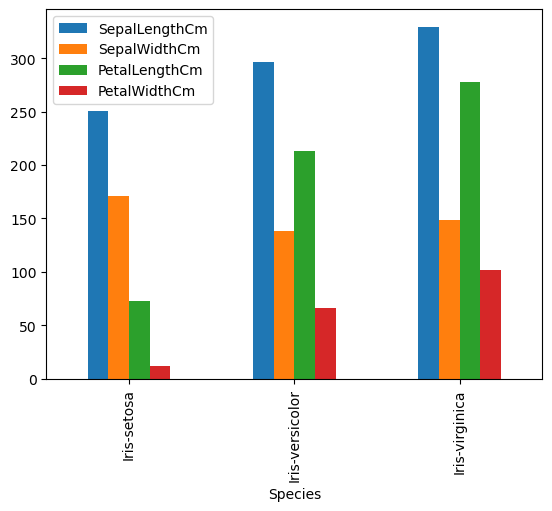

In [9]:
df.groupby(['Species']).sum().plot(kind='bar')

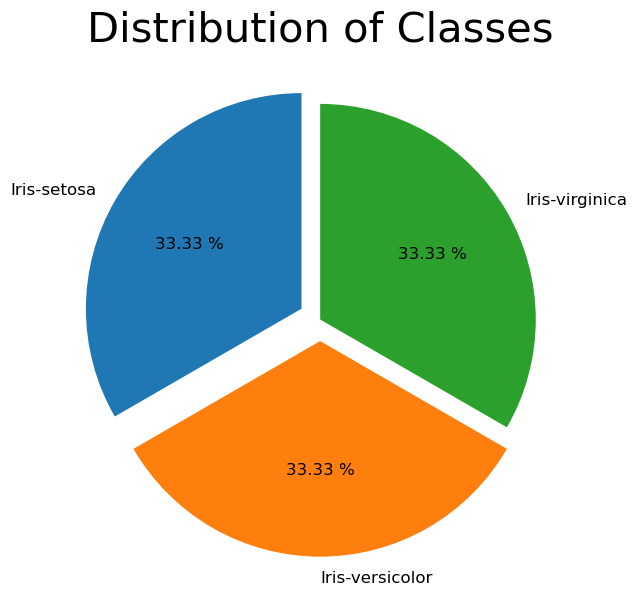

In [10]:
count_list = [(df.Species == 'Iris-setosa').sum(), (df.Species == 'Iris-versicolor').sum(), (df.Species == 'Iris-virginica').sum()]
label_list = list(df['Species'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 30)
plt.show()

The classes are equally balanced. Now, let us look at the count of each flower type in our dataset.

In [11]:
print("The distribution of the classes is:\n", df['Species'].value_counts(), sep = "")

The distribution of the classes is:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


# Visualisation en 3D Interactive !

In [12]:
import plotly.express as px
df2 = px.data.iris()
fig = px.scatter_3d(df2, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

<font size="4"> Séparer Species et les longueurs des plantes :

In [13]:
y = df['Species']
X = df.drop(['Species'], axis = 1)
print(X, "\n\n", y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 

 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Ir

# Laber Encoding

In [14]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Scaling the data

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Visualisation des corrélations :

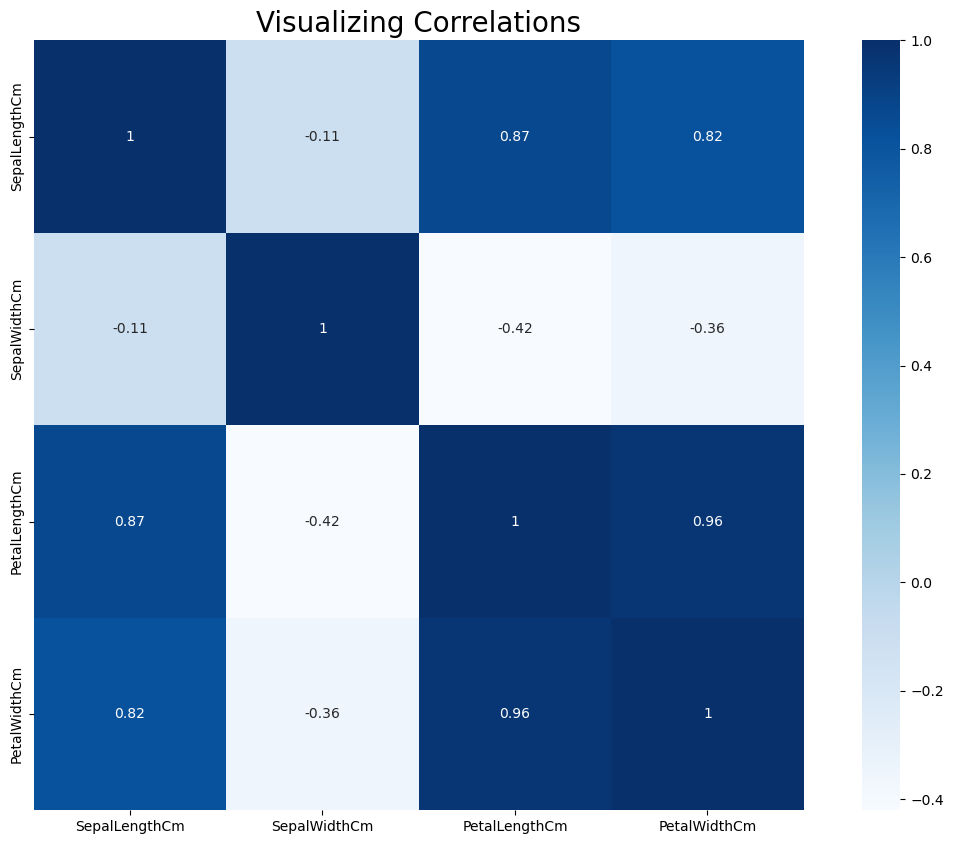

In [16]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

# Séparer les données train et les données test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

# Evaluation du modèle

In [18]:
from sklearn.metrics import accuracy_score, f1_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)
print("The accuracy for KNN is:", acc_knn * 100, "%")
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='macro'))

The accuracy for KNN is: 97.77777777777777 %
0.9777777777777777
0.9777530589543938


# Précision du modèle selon la valeur de K

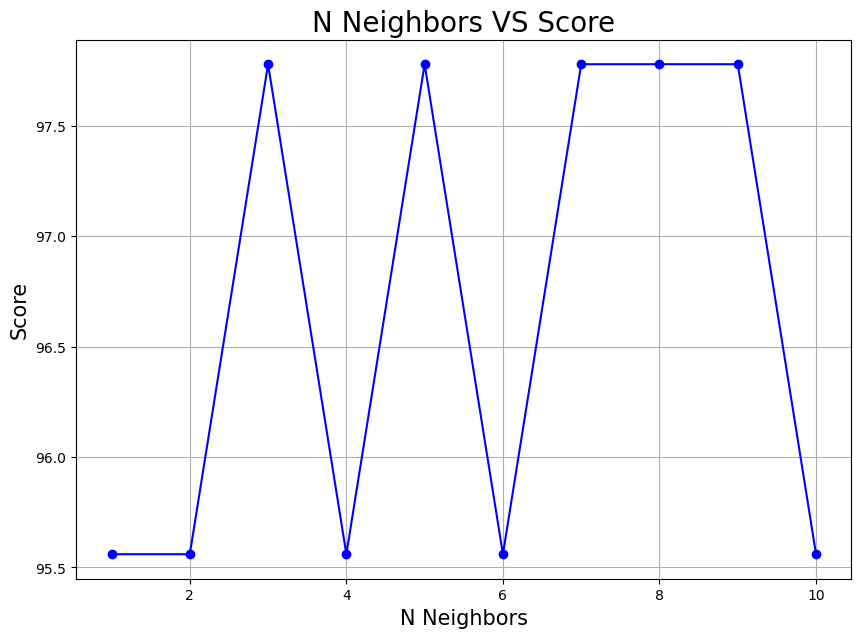

In [19]:
store_acc = []
neighbors = [i for i in range(1, 11)]
for i in range(len(neighbors)):
    knn_improved = KNeighborsClassifier(n_neighbors = neighbors[i])
    knn_improved.fit(X_train, y_train)
    y_pred = knn_improved.predict(X_test)
    acc_knn_for_diff_values = round((knn_improved.score(X_test, y_test)) * 100, 2)
    store_acc.append(acc_knn_for_diff_values)
plt.figure(figsize = (10, 7))
plt.plot(neighbors, store_acc, color = 'blue', marker = 'o')
plt.title('N Neighbors VS Score', fontsize = 20)
plt.xlabel('N Neighbors', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid(True)
plt.show()

# Trouver les meilleurs paramètres de Knn avec GridSearch

In [20]:
from sklearn.metrics import accuracy_score, f1_score
for i in [0.15,0.2,0.3] :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, stratify = y, random_state = 0)
    knn = KNeighborsClassifier()
    from sklearn.model_selection import GridSearchCV
    k_range = list(range(1, 11))
    param_grid = dict(n_neighbors=k_range)
    param_grid["metric"]=["euclidean","manhattan"]
    param_grid["weights"]=["uniform","distance"]
    # defining parameter range
    grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy', return_train_score=False,verbose=1)
    print ("pour test_size =",i)
    # fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("-"*50)  

pour test_size = 0.15
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.9528729838709677
--------------------------------------------------
pour test_size = 0.2
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.9583333333333334
--------------------------------------------------
pour test_size = 0.3
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.961894586894587
--------------------------------------------------


# 2ème algorithme :

# Logistic Regression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
print(y_pred)

The accuracy for Logistic Regression is: 97.77777777777777 %
[2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 1 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2]


# We can see that Knn performed better at classifying the iris dataset


In [22]:
# fig = plt.figure(figsize = (15, 10))

# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4)

# ax1.plot((df[df['Species'] == 'Iris-setosa'])['SepalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-setosa'])['SepalLengthCm']), 'ro')
# ax1.plot((df[df['Species'] == 'Iris-virginica'])['SepalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-virginica'])['SepalLengthCm']), 'go')
# ax1.plot((df[df['Species'] == 'Iris-versicolor'])['SepalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['SepalLengthCm']), 'bo')
# ax1.set_title('Analysis of Sepal Length', size = 20)
# ax1.get_yaxis().set_visible(False)

# ax2.plot((df[df['Species'] == 'Iris-setosa'])['SepalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-setosa'])['SepalWidthCm']), 'ro')
# ax2.plot((df[df['Species'] == 'Iris-virginica'])['SepalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-virginica'])['SepalWidthCm']), 'go')
# ax2.plot((df[df['Species'] == 'Iris-versicolor'])['SepalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['SepalWidthCm']), 'bo')
# ax2.set_title('Analysis of Sepal Width', size = 20)
# ax2.get_yaxis().set_visible(False)

# ax3.plot((df[df['Species'] == 'Iris-setosa'])['PetalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-setosa'])['PetalLengthCm']), 'ro')
# ax3.plot((df[df['Species'] == 'Iris-virginica'])['PetalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-virginica'])['PetalLengthCm']), 'go')
# ax3.plot((df[df['Species'] == 'Iris-versicolor'])['PetalLengthCm'], np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['PetalLengthCm']), 'bo')
# ax3.set_title('Analysis of Petal Length', size = 20)
# ax3.get_yaxis().set_visible(False)

# ax4.plot((df[df['Species'] == 'Iris-setosa'])['PetalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-setosa'])['PetalWidthCm']), 'ro')
# ax4.plot((df[df['Species'] == 'Iris-virginica'])['PetalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-virginica'])['PetalWidthCm']), 'go')
# ax4.plot((df[df['Species'] == 'Iris-versicolor'])['PetalWidthCm'], np.zeros_like((df[df['Species'] == 'Iris-versicolor'])['PetalWidthCm']), 'bo')
# ax4.set_title('Analysis of Petal Width', size = 20)
# ax4.get_yaxis().set_visible(False)

# plt.subplots_adjust(left = 0.1,
#                     bottom = 0.1, 
#                     right = 0.9, 
#                     top = 0.9, 
#                     wspace = 0.4, 
#                     hspace = 0.4)
# plt.show()

**Observations**:
 - `SepalLengthCm`: Iris-setosa has the smallest sepal length. We can see an outlier (red dot) in the graph. Iris-versicolor has a sepal length of about 5 cm to 7 cm. Iris-virginica has the largest sepal length (above 7 cm).
 - `SepalWidthCm`: Iris-versicolor has the smallest sepal width. The distinction between setosa and virginica is not so prominent in the range of 3.5 cm to 4 cm. However for a sepal width equal to or greater than 4 cm all the flowers belong to the Iris-setosa species.
 - `PetalLengthCm`: Iris-setosa has the smallest petal length. The length of the petals do not exceed 2 cm. For Iris-versicolor the petal length is in the range of 3 cm to 5 cm. Iris-virginica has the largest petal length (5 cm or greater).
 - `PetalWidthCm`: Iris-setosa has the smallest petal width. Iris-versicolor has a petal length from 1 cm to slightly less than 2 cm. Iris-virginica has a petal width that is approximately greater than 1.8 cm.

# Boxplots

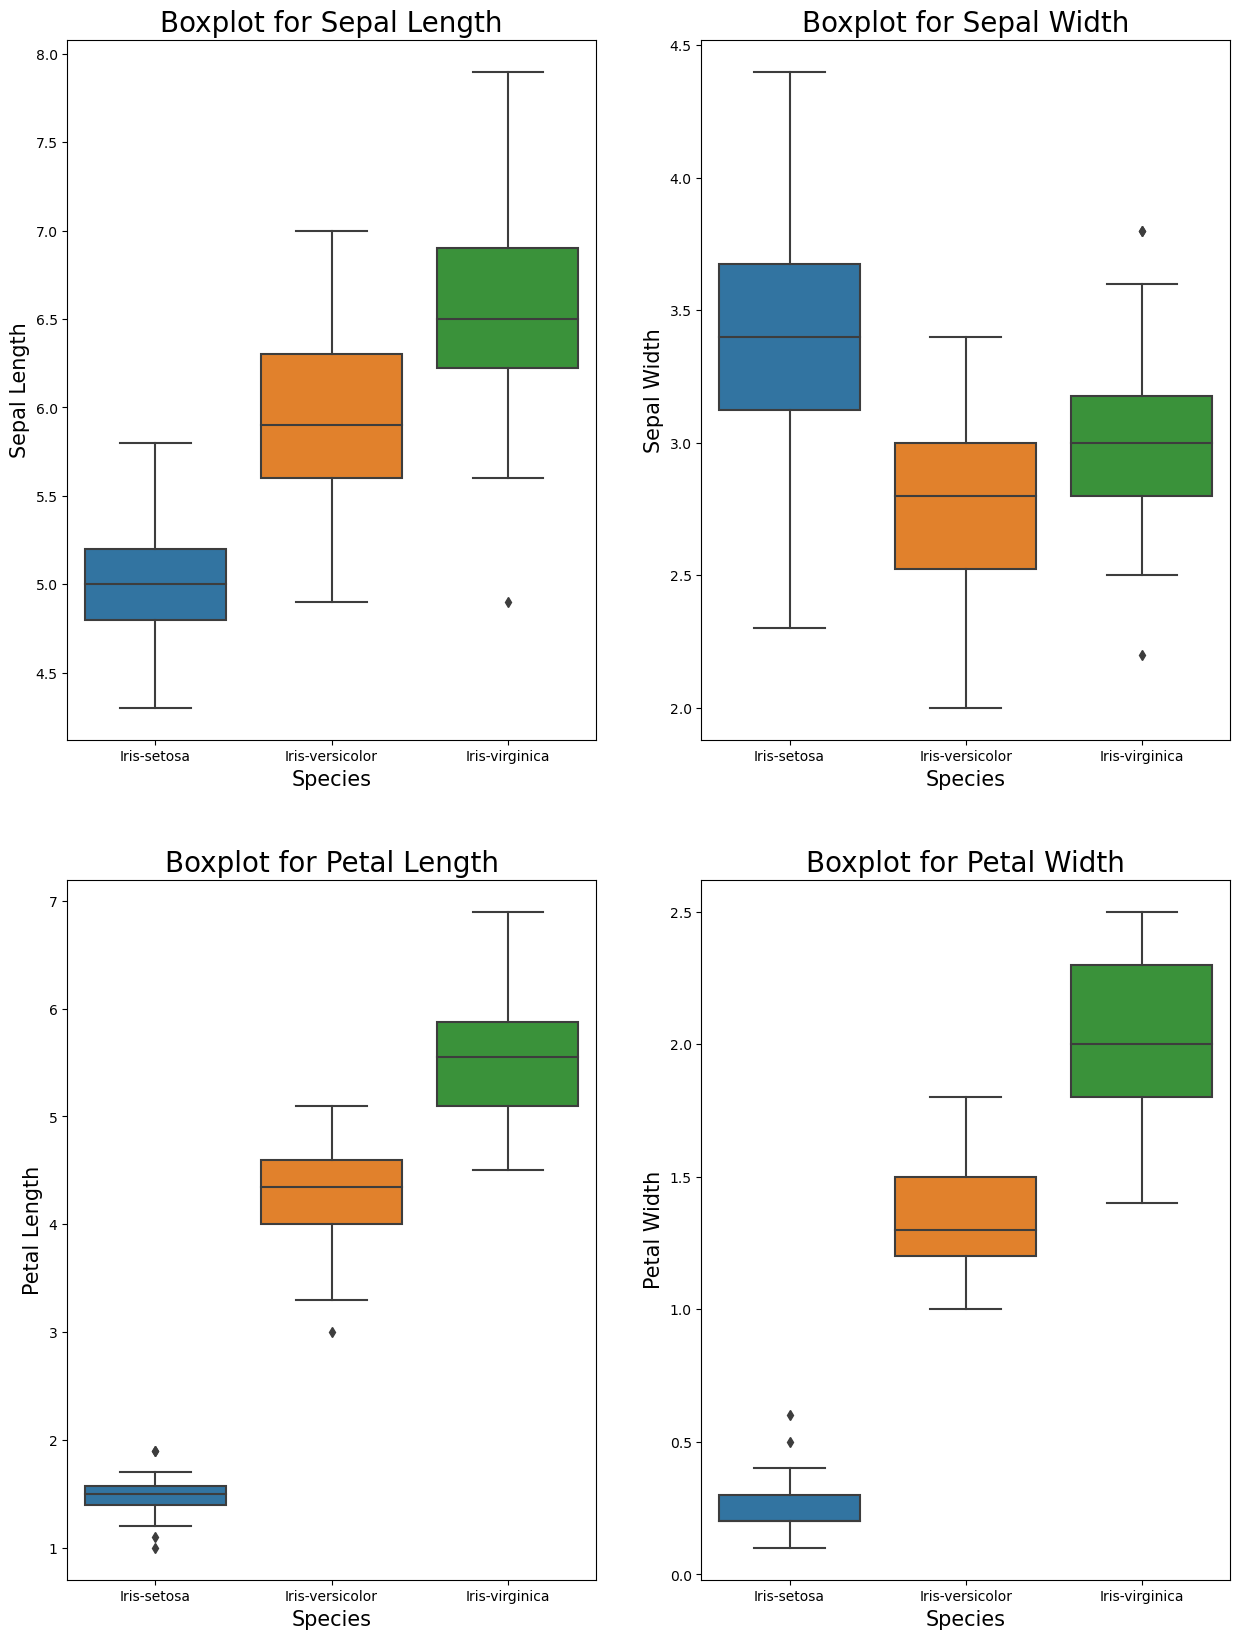

In [23]:
plt.figure(figsize=(15, 20))

def create_boxplot(feature):
    sns.boxplot(data = df, x = 'Species', y = feature)
    if(feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if(feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if(feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if(feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Boxplot for ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
      
plt.subplot(221)
create_boxplot('SepalLengthCm')
  
plt.subplot(222)
create_boxplot('SepalWidthCm')
  
plt.subplot(223)
create_boxplot('PetalLengthCm')
  
plt.subplot(224)
create_boxplot('PetalWidthCm')
  
plt.show()

**Observations**:
 - `SepalLengthCm`: The median value for sepal length is the least for Iris-setosa and the most for Iris-virginica.
 - `SepalWidthCm`: The median value for sepal width is the least for Iris-versicolor and the largest for Iris-setosa. Based on the sepal width of the flowers it might be tough to differentiate between the 3 species.
 - `PetalLengthCm`: Visually it is very evident that Iris-setosa has the least petal length. Even though there are a few outliers all of them are less than 2 cm. Iris-versicolor has the second largest median petal length, whereas Iris-virginica has the largest median petal length.
 - `PetalWidthCm`: Similar to the petal lengths of the species, we can see that Iris-setosa has the lowest median petal width, whereas Iris-virginica has the largest median petal width.

# Classification Report
 > A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained    classification model. Some of the common terms associated with a classification report are as follows:
> - **Precision**: Precision is defined as the ratio of true positives to the sum of true and false positives.
> - **Recall**: Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
> - **F1 Score**: The F1 Score is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
> - **Support**: Support is the number of actual occurrences of the classes in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process. 

**Credits for the ML algorithms**: https://www.kaggle.com/marcovasquez/top-machine-learning-algorithms-beginner#Machine-Learning-with-Scikit-Learn--

In [24]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()    

# Logistic Regression
Logistic regression, despite its name, is a classification model rather than regression model. It is a process of modeling the probability of a discrete outcome given input variables. 

The accuracy for Logistic Regression is: 97.77777777777777 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



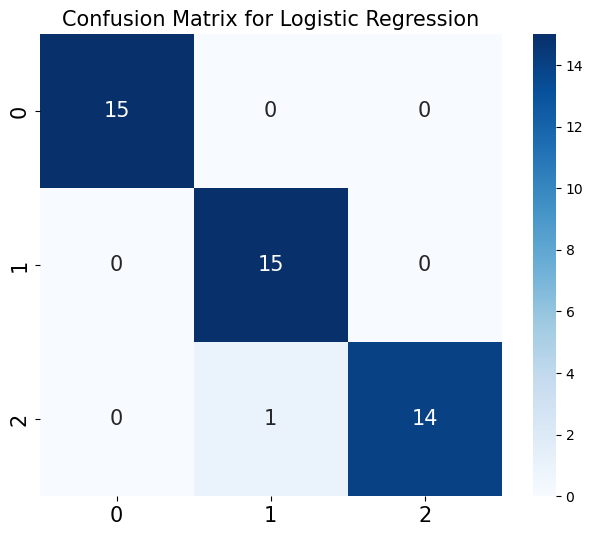

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
generate_results(lr, y_pred, 'Logistic Regression')

# KNN
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)
print("The accuracy for KNN is:", acc_knn * 100, "%")

The accuracy for KNN is: 97.77777777777777 %


# KNN Model Performance
On the default KNN model we are getting a score of 96.67%. The default value for `n_neighbors` is 5 in KNN. Lets look at the score for different values of `n_neighbors` and select the value that gives us the best results.

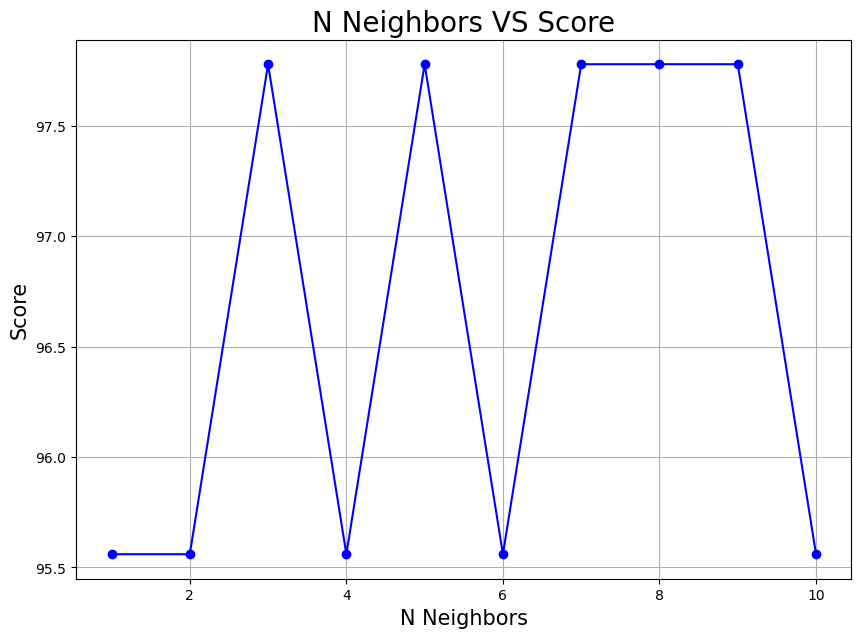

In [27]:
store_acc = []
neighbors = [i for i in range(1, 11)]
for i in range(len(neighbors)):
    knn_improved = KNeighborsClassifier(n_neighbors = neighbors[i])
    knn_improved.fit(X_train, y_train)
    y_pred = knn_improved.predict(X_test)
    acc_knn_for_diff_values = round((knn_improved.score(X_test, y_test)) * 100, 2)
    store_acc.append(acc_knn_for_diff_values)
plt.figure(figsize = (10, 7))
plt.plot(neighbors, store_acc, color = 'blue', marker = 'o')
plt.title('N Neighbors VS Score', fontsize = 20)
plt.xlabel('N Neighbors', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid(True)
plt.show()

From the graph above we can clearly observe that for all values of `n_neighbors` above 6, the accuracy is a 100%. Lets select the smallest value of `n_neighbors` that gives us the highest accuracy which is 7.

The accuracy for KNN is: 97.77777777777777 %

The classification report for KNN (n_neighbors = 7) is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



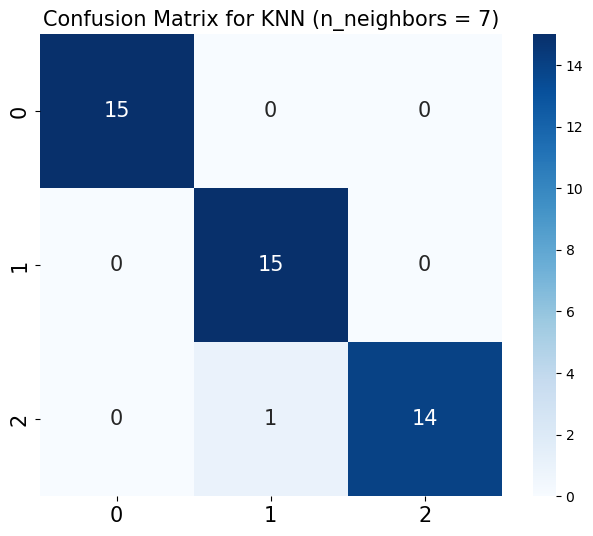

In [28]:
knn_improved = KNeighborsClassifier(n_neighbors = 7)
knn_improved.fit(X_train, y_train)
y_pred = knn_improved.predict(X_test)
acc_knn_imp = knn_improved.score(X_test, y_test)
print("The accuracy for KNN is:", acc_knn_imp * 100, "%")
generate_results(knn_improved, y_pred, 'KNN (n_neighbors = 7)')

# Radius Neighbors Classifier
Radius Neighbors Classifier is a classification machine learning algorithm. It is an extension to the k-nearest neighbors algorithm that makes predictions using all examples in the radius of a new example rather than the k-closest neighbors. As such, the radius-based approach to selecting neighbors is more appropriate for sparse data, preventing examples that are far away in the feature space from contributing to a prediction.

The accuracy for Radius Neighbors Classifier is: 95.55555555555556 %

The classification report for Radius Neighbors Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



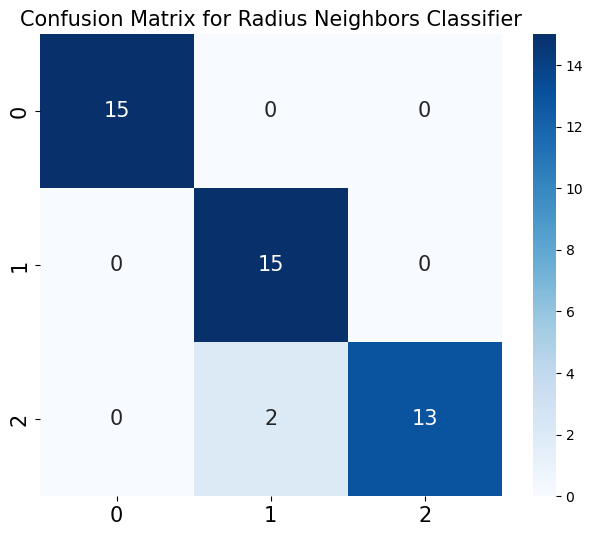

In [29]:
rnc = RadiusNeighborsClassifier()
rnc.fit(X_train, y_train)
y_pred = rnc.predict(X_test)
acc_rnc = rnc.score(X_test, y_test)
print('The accuracy for Radius Neighbors Classifier is:', acc_rnc * 100, "%")
generate_results(rnc, y_pred, 'Radius Neighbors Classifier')

# Gaussian Naive Bayes
This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.

The accuracy for Gaussian Naive Bayes is: 97.77777777777777 %

The classification report for Gaussian Naive Bayes is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



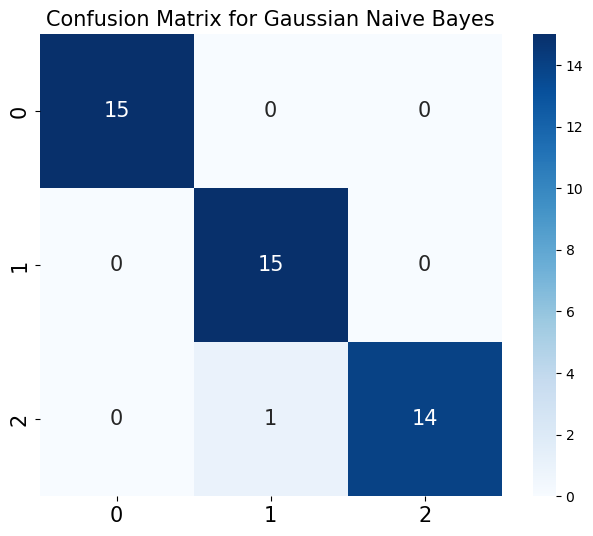

In [30]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_gnb = gnb.score(X_test, y_test)
print('The accuracy for Gaussian Naive Bayes is:', acc_gnb * 100, '%')
generate_results(gnb, y_pred, 'Gaussian Naive Bayes')

# Support Vector Classifier
It is a supervised classification algorithm. The idea of SVM is simple. It creates a line or a hyperplane which separates the data into classes.

The accuracy for SVC is: 97.77777777777777 %

The classification report for Support Vector Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



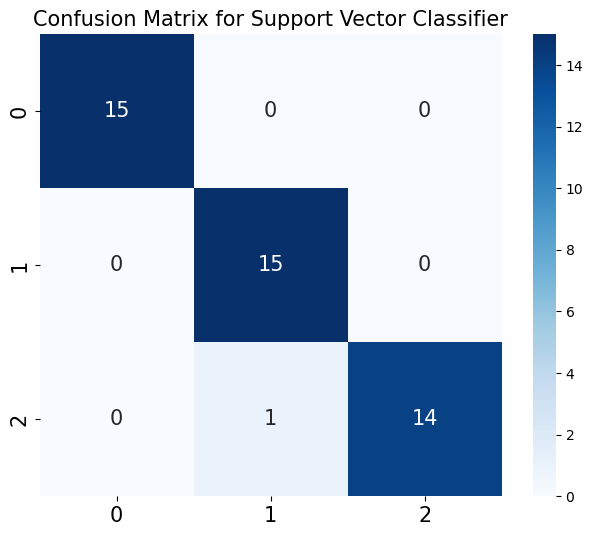

In [31]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print('The accuracy for SVC is:', acc_svc * 100, '%')
generate_results(svc, y_pred, 'Support Vector Classifier')

# Quadratic Discriminant Analysis
QDA is a variant of LDA (Linear Discriminant Analysis) in which an individual covariance matrix is estimated for every class of observations. QDA is particularly useful if there is prior knowledge that individual classes exhibit distinct covariances.

The accuracy for Quadratic Discriminant Analysis is: 100.0 %

The classification report for QDA is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



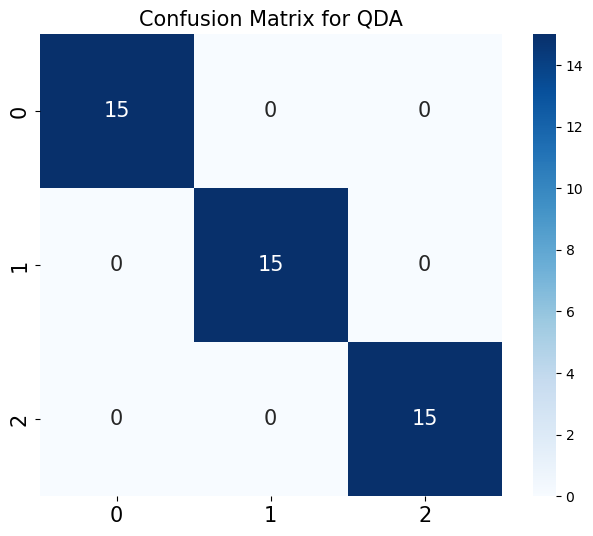

In [32]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc_qda = qda.score(X_test, y_test)
print('The accuracy for Quadratic Discriminant Analysis is:', acc_qda * 100, '%')
generate_results(qda, y_pred, 'QDA')

# Decision Tree Classifier
A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions. On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity.

The accuracy of the Decision Tree Classifier is: 95.55555555555556 %

The classification report for Decision Tree Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



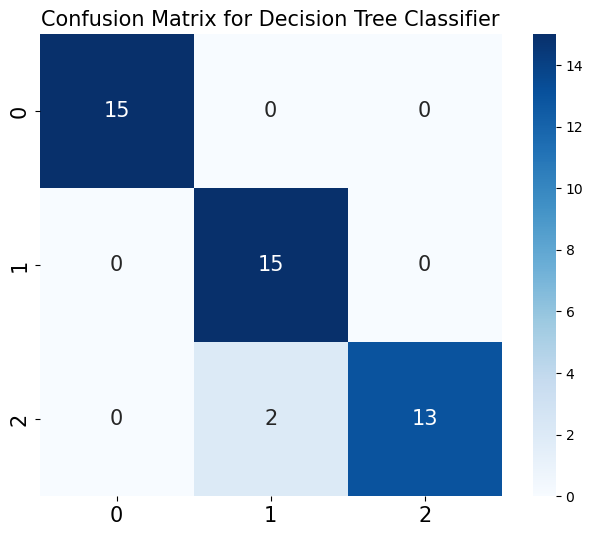

In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)
print('The accuracy of the Decision Tree Classifier is:', acc_dtc * 100, '%')
generate_results(dtc, y_pred, 'Decision Tree Classifier')

# Random Forest Classifier
The term “Random Forest Classifier” refers to the classification algorithm made up of several decision trees. The algorithm uses randomness to build each individual tree to promote uncorrelated forests, which then uses the forest's predictive powers to make accurate decisions.

The accuracy of the Random Forest Classifier is: 95.55555555555556 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



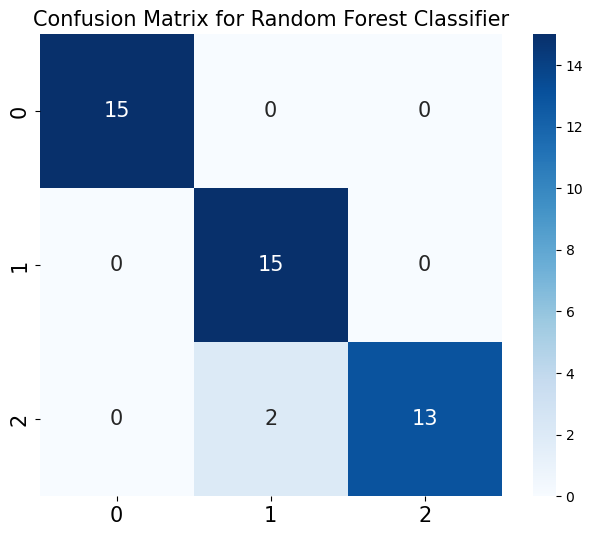

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

# Ada Boost Classifier
It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.

The accuracy for Ada Boost Classifier is: 95.55555555555556 %

The classification report for Ada Boost Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



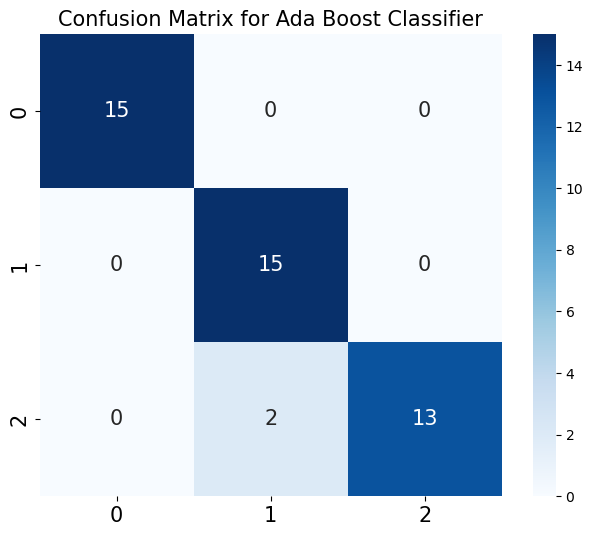

In [35]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc_abc = abc.score(X_test, y_test)
print('The accuracy for Ada Boost Classifier is:', acc_abc * 100, '%')
generate_results(abc, y_pred, 'Ada Boost Classifier')

# Extra Trees Classifier
This is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

The accuracy for Etra Trees Classifier is: 100.0 %

The classification report for Extra Tress Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



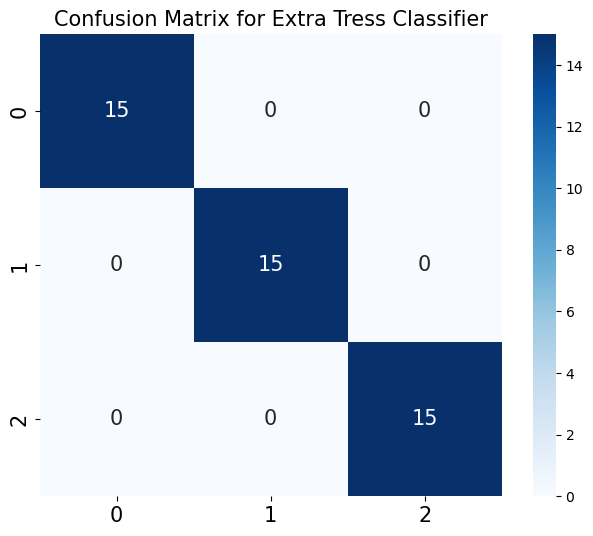

In [36]:
etc = ExtraTreesClassifier(random_state = 0)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
acc_etc = etc.score(X_test, y_test)
print('The accuracy for Etra Trees Classifier is:', acc_etc * 100, '%')
generate_results(etc, y_pred, 'Extra Tress Classifier')

# Bagging Classifier
Bagging classifier is an ensemble technique that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions to form a final prediction.

The accuracy for Bagging Classifier is: 97.77777777777777 %

The classification report for Bagging Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



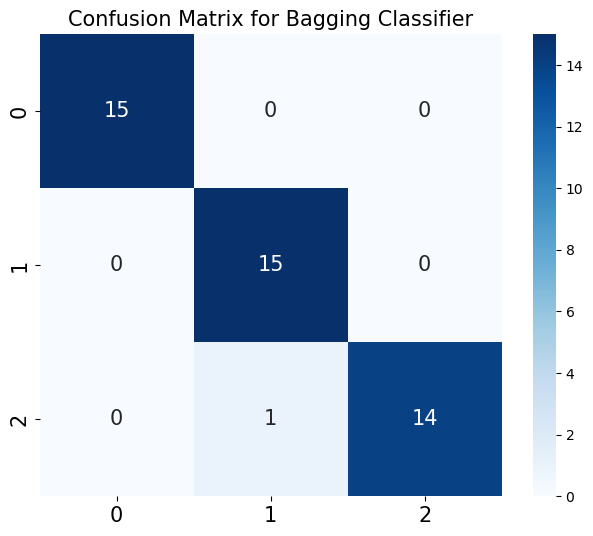

In [37]:
bc = BaggingClassifier()
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_bc = bc.score(X_test, y_test)
print('The accuracy for Bagging Classifier is:', acc_bc * 100, '%')
generate_results(bc, y_pred, 'Bagging Classifier')

# Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

The accuracy for the Gradient Boosting Classifier is: 97.77777777777777 %

The classification report for Gradient Boosting Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



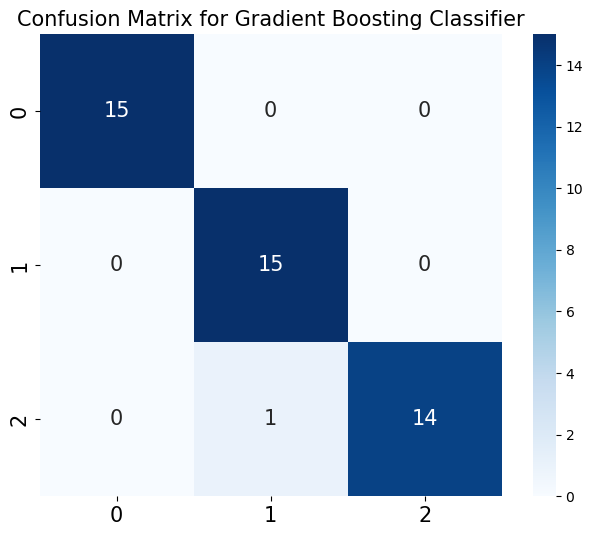

In [38]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = gbc.score(X_test, y_test)
print('The accuracy for the Gradient Boosting Classifier is:', acc_gbc * 100, '%')
generate_results(gbc, y_pred, 'Gradient Boosting Classifier')

# XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost provides a highly efficient implementation of the stochastic gradient boosting algorithm and access to a suite of model hyperparameters designed to provide control over the model training process.

The accuracy for XGB Classifier is: 95.55555555555556 %

The classification report for XGB Classifier is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



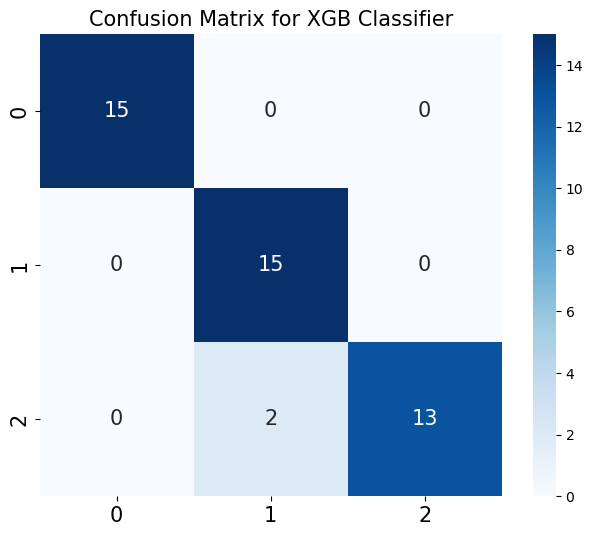

In [39]:
xgbc = XGBClassifier(n_jobs = -1, silent = True, verbosity = 0)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
acc_xgbc = xgbc.score(X_test, y_test)
print('The accuracy for XGB Classifier is:', acc_xgbc * 100, '%')
generate_results(xgbc, y_pred, 'XGB Classifier')

# Final Results

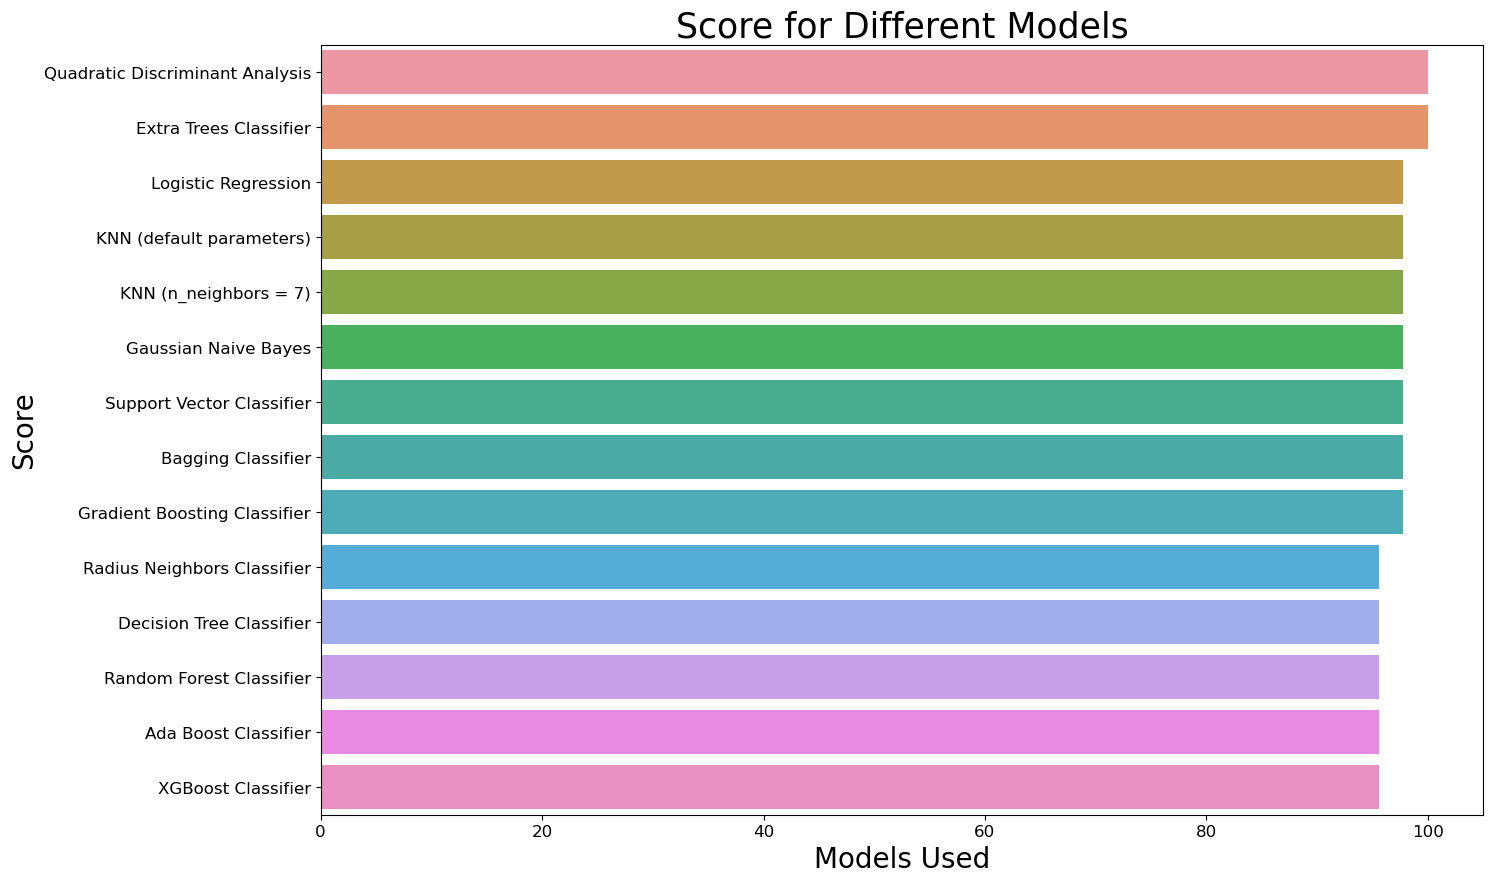

In [40]:
data = {'Logistic Regression': acc_lr * 100, 
        'KNN (default parameters)': acc_knn * 100, 
        'KNN (n_neighbors = 7)': acc_knn_imp * 100, 
        'Radius Neighbors Classifier': acc_rnc * 100, 
        'Gaussian Naive Bayes': acc_gnb * 100,
        'Support Vector Classifier': acc_svc * 100, 
        'Quadratic Discriminant Analysis': acc_qda * 100, 
        'Decision Tree Classifier': acc_dtc * 100, 
        'Random Forest Classifier': acc_rfc * 100,
        'Ada Boost Classifier': acc_abc * 100, 
        'Extra Trees Classifier': acc_etc * 100,
        'Bagging Classifier': acc_bc * 100, 
        'Gradient Boosting Classifier': acc_gbc * 100,
        'XGBoost Classifier': acc_xgbc * 100}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = models)
plt.xlabel("Models Used", size = 20)
plt.xticks(size = 12)
plt.ylabel("Score", size = 20)
plt.yticks(size = 12)
plt.title("Score for Different Models", size = 25)
plt.show()